In [7]:
import matplotlib.pyplot as plt

from tick.plot import plot_hawkes_kernels
from tick.hawkes import SimuHawkesSumExpKernels, SimuHawkesMulti, \
    HawkesSumExpKern

end_time = 1000
n_realizations = 10

decays = [.5, 2., 6.]
baseline = [0.12, 0.07]
adjacency = [[[0, .1, .4], [.2, 0., .2]],
             [[0, 0, 0], [.6, .3, 0]]]

hawkes_exp_kernels = SimuHawkesSumExpKernels(
    adjacency=adjacency, decays=decays, baseline=baseline,
    end_time=end_time, verbose=False, seed=1039)

multi = SimuHawkesMulti(hawkes_exp_kernels, n_simulations=n_realizations)

multi.end_time = [(i + 1) / 10 * end_time for i in range(n_realizations)]
multi.simulate()

learner = HawkesSumExpKern(decays, penalty='elasticnet',
                           elastic_net_ratio=0.8)
learner.fit(multi.timestamps)

print(learner.score())


3.4730436612442173


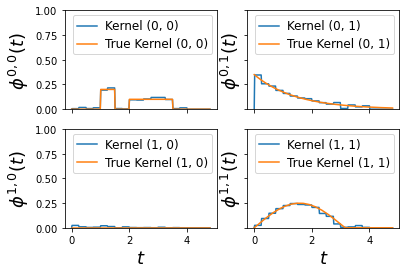

0.37606852822408826


In [8]:
import numpy as np
import matplotlib.pyplot as plt

from tick.hawkes import (SimuHawkes, HawkesKernelTimeFunc, HawkesKernelExp,
                         HawkesEM)
from tick.base import TimeFunction
from tick.plot import plot_hawkes_kernels

run_time = 30000

t_values1 = np.array([0, 1, 1.5, 2., 3.5], dtype=float)
y_values1 = np.array([0, 0.2, 0, 0.1, 0.], dtype=float)
tf1 = TimeFunction([t_values1, y_values1],
                   inter_mode=TimeFunction.InterConstRight, dt=0.1)
kernel1 = HawkesKernelTimeFunc(tf1)

t_values2 = np.linspace(0, 4, 20)
y_values2 = np.maximum(0., np.sin(t_values2) / 4)
tf2 = TimeFunction([t_values2, y_values2])
kernel2 = HawkesKernelTimeFunc(tf2)

baseline = np.array([0.1, 0.3])

hawkes = SimuHawkes(baseline=baseline, end_time=run_time, verbose=False,
                    seed=2334)

hawkes.set_kernel(0, 0, kernel1)
hawkes.set_kernel(0, 1, HawkesKernelExp(.5, .7))
hawkes.set_kernel(1, 1, kernel2)

hawkes.simulate()

em = HawkesEM(4, kernel_size=16, n_threads=8, verbose=False, tol=1e-3)
em.fit(hawkes.timestamps)

fig = plot_hawkes_kernels(em, hawkes=hawkes, show=False)

for ax in fig.axes:
    ax.set_ylim([0, 1])
plt.show()

print(em.score())

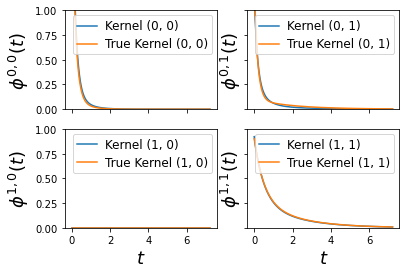

In [9]:

fig = plot_hawkes_kernels(learner, hawkes=hawkes_exp_kernels, show=False)
for ax in fig.axes:
    ax.set_ylim([0., 1.])